 # MKA-MLF, Lab_07 Convolutional Neural Networks

## Exercise - XOR Gate

## Exercise - Hand-written digits recognition

Create CNN which will process and recognize handwritten digits. For this purposes please use the MNIST database (Modified National Institute of Standards and Technology database) which is a large database of handwritten digits that is commonly used for training various image processing systems.

The datasample of the MNIST datasets can be see in the following picture

### Task description

In the terms of machine learning, the Hand-written digits recognition can be threated as a multi-class classification problem. This is very important knowledge to structure our model in the correct way (Especially the output-layer, including the number of neurons and activations function and the overall loss function and classification metrics)

### 0. Import libraries

Import the all necessary libraries, you can get inspired by the previous exercises. You can improst the libraries gradually, when do you progressing with the task

In [13]:
from tensorflow import keras
from keras.models import Sequential
from keras.datasets import mnist
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
###################################
# Write your own code here #
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam


###################################
font = {'weight' : 'bold',
        'size'   : 12}

matplotlib.rc('font', **font)

### 1. Dataset

#### 1.1 Load Dataset

You can load the dataset using the following code

In [6]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

#### 1.2 Dataset examination

Using the following code, display random images,

In [7]:
def display_random_images(x_data: np.array, y_data: np.array, count: int = 10) -> None:
  index = np.array(len(x_data))
  selected_ind = np.random.choice(index, count)

  selected_img = x_data[selected_ind]
  selected_labels = y_data[selected_ind]
  concat_img = np.concatenate(selected_img, axis=1)

  plt.figure(figsize=(20,10))
  plt.imshow(concat_img, cmap="gray")

  for id_label, label in enumerate(selected_labels):
    plt.text(14 + 28*id_label, 28*(5/4), label)
  plt.axis('off')
  plt.show()

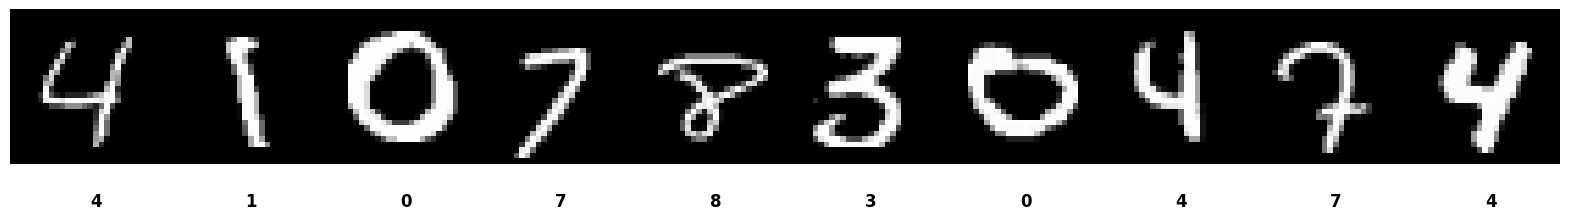

In [8]:
display_random_images(X_train, y_train)

Examine the dataset. Answer for yourself the following questions:

- What kind of data occurs in our dataset?
ANS: The dataset contains images of handwritten digits (0–9) and their corresponding numeric labels
- How many data samples do we have in train and test datasets?
ANS: train 60 000, test 10 000
- How many colour channels does the input variable have?
ANS: Each image is grayscale, so it has 1 channel.
- What is the size of the input images?
ANS: Each image is 28 × 28 pixels in size.
- What is the necessary preprocessing of the input data X?
ANS: Required preprocessing steps:
Normalize pixel values (e.g., divide by 255 to get values between 0 and 1)
Reshape: add a channel dimension → from (28, 28) to (28, 28, 1)
- How many classes do we have in target varoable?
ANS: There are 10 classes (digits from 0 to 9).
- What is the necessary preprocessing of target variable y?
ANS: Use one-hot encoding: convert class labels (e.g., 3) into binary vectors


#### 1.3 Dataset preprocessing

Perform the necessary data preprocessing. The best way to preprocess the data would be one hot encoding for the target variable and normalization for the input variable (using min-max or z-score normalization)

In [15]:
###################################
# Write your own code here #
# Normalize input images to the range [0, 1]
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

# Reshape to add channel dimension (grayscale = 1 channel)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# One-hot encode target labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)


###################################

### 2. Build the model

In this section, your task will be to define the model architecture. The intial structure can be defined as follows:

Input_layer -> Convolutional_layer(kernel_size=(3,3), no_channels=32) -> Maxpooling_layer(kernel_size=(2, 2)) -> Flatten_layer -> Dense_layer (num_classes)
    
    


#### 2.1 Define the model structure

In [17]:
model = Sequential()
###################################
# Write your own code here #

# Convolutional layer
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))

# MaxPooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

# Flatten layer
model.add(Flatten())

# Dense output layer
model.add(Dense(10, activation='softmax'))  # 10 classes for digits 0–9

###################################


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#### 2.2 Compile the model

Build the model, use the relevant metrics, optimizer and loss function. While choosing the metrics and loss function, consider fact that we are are trying to solve the multiclass classification problem

In [18]:
loss = None
optimizer = None
metrics = None

###################################
# Write your own code here #
# Set parameters

loss = 'categorical_crossentropy'
optimizer = Adam(learning_rate=0.001)
metrics = ['accuracy']

# Compile the model
model.compile(
    loss=loss,
    optimizer=optimizer,
    metrics=metrics
)

# Print model summary
model.summary()


###################################

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 5408)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │          54,090 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 54,410 (212.54 KB)

 Trainable params: 54,410 (212.54 KB)

 Non-trainable params: 0 (0.00 B)

### 3. Training stage

#### 3.1 Model training

train your model, define the relevant hyperparameters (no. epochs, batch_size), use 20p of the training data for validation

In [20]:
###################################
# Write your own code here #

# Define hyperparameters
epochs = 10
batch_size = 128

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_split=0.2,
    verbose=1
)

###################################

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 21s 51ms/step - accuracy: 0.8183 - loss: 0.7114 - val_accuracy: 0.9517 - val_loss: 0.1788
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 20s 53ms/step - accuracy: 0.9547 - loss: 0.1591 - val_accuracy: 0.9687 - val_loss: 0.1144
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 17s 46ms/step - accuracy: 0.9726 - loss: 0.1000 - val_accuracy: 0.9750 - val_loss: 0.0893
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 18s 48ms/step - accuracy: 0.9786 - loss: 0.0769 - val_accuracy: 0.9775 - val_loss: 0.0804
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 20s 47ms/step - accuracy: 0.9807 - loss: 0.0674 - val_accuracy: 0.9783 - val_loss: 0.0727
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 17s 46ms/step - accuracy: 0.9841 - loss: 0.0555 - val_accuracy: 0.9800 - val_loss: 0.0703
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 18s 48ms/step - accuracy: 0.9861 - loss: 0.0485 - val_accuracy: 0.9791 - val_loss: 0.0699
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 22s 51ms/step - accuracy: 0.9869 - loss: 0.0443 - 

#### 3.1 Model Evaluation on validation data

Plot the development of the training and validation loss, and training and validation metrics.

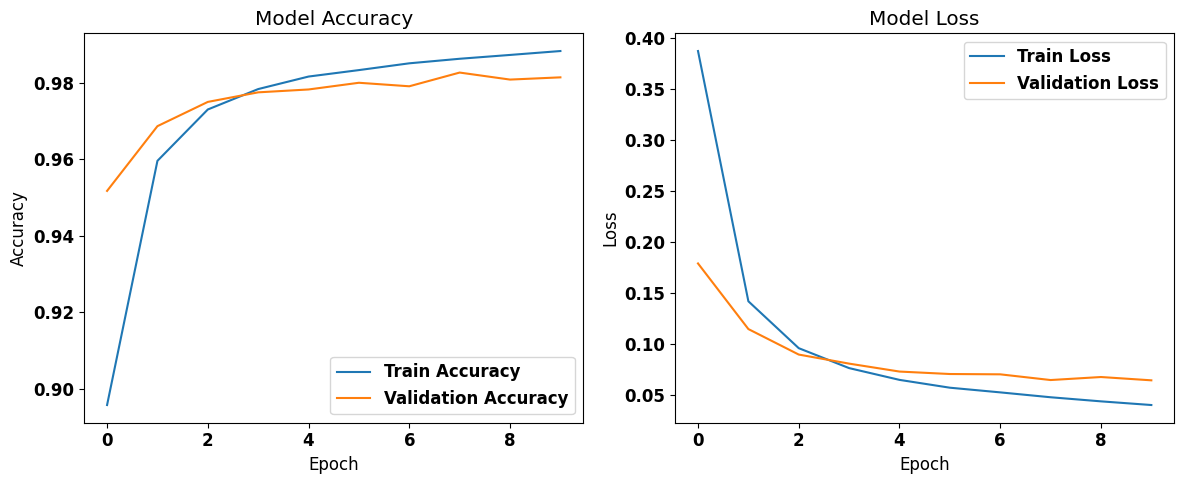

In [21]:
###################################
# Write your own code here #
# Plot training and validation accuracy and loss
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


###################################

### 4. Model evaluation

Evaluate the model on the testing dataset using the relevant metrics. Use the confusion metrics as the one of the metrics.

Test Accuracy: 0.9821
Test Loss: 0.0557
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


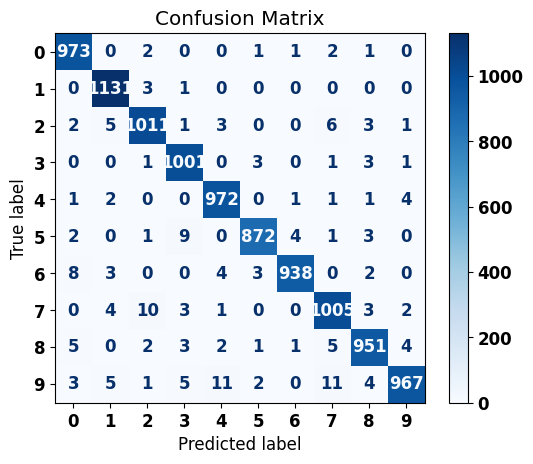

In [23]:
###################################

# Write your own code here #
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Evaluate model on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

# Predict class labels
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

###################################

### 5. Hyperparameter tunning and regularization techniques

When your code is ready and fully functional, try several changes in the hyperparameters and see how they influence the testing metrics. Try changes in the network structure. You can also try adding regularization techniques such as L1, L2, and Dropout. Based on the development of training and validation loss, try to identify overfitting and avoid it

Learning Rate
- Should be balanced — too high may cause instability, too low slows down learning. Common values: 0.001, 0.0005.

Model Complexity
- Adding layers can improve accuracy but may lead to overfitting.

Dropout
- Helps prevent overfitting by randomly disabling neurons during training. Typical values: 0.3–0.5.

L2 Regularization
- Reduces overfitting by limiting large weights in the network.